In [1]:
def loadAndFormatData(filename):
    data = pd.read_csv(filename, sep=", ", header=None)
    data.columns = ["x1", "x2", "x3", "x4","x5","x6","x7","x8","x9","x10","x11","x12","x13","x14","x15","x16"]
    data.drop(["x3", "x7", "x8", "x9", "x10", "x11", "x12", "x13", "x14", "x15", "x16"], axis=1, inplace=True)
    return data


import pandas as pd
import numpy as np

# dataLeftMost = loadAndFormatData('sonarLogLeftMost.txt')
# print(dataLeftMost.info())

dataLeft = loadAndFormatData('sonarLogL.txt')
# print(dataLeft.head())
# dataRightMost = loadAndFormatData('sonarLogRightMost.txt')
dataRight = loadAndFormatData('sonarLogR.txt')
dataMid = loadAndFormatData('sonarLogM.txt')


C:\ProgramData\Miniconda2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [2]:
dataRight.info()
dataRight.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 5 columns):
x1    2510 non-null float64
x2    2510 non-null float64
x4    2510 non-null float64
x5    2510 non-null float64
x6    2510 non-null float64
dtypes: float64(5)
memory usage: 98.1 KB


,x1,x2,x4,x5,x6
count,2510.000000,2510.000000,2510.000000,2510.000000,2510.000000
mean,0.472133,0.570142,1.163217,1.121042,0.955741
std,0.359037,0.016745,0.744204,0.626108,0.555675
min,0.127000,0.400000,0.238000,0.305000,0.264000
25%,0.289000,0.571000,0.636000,0.813000,0.776000
50%,0.557000,0.573000,0.782000,0.816000,0.780000
75%,0.562000,0.573000,2.054000,0.825000,0.783000
max,2.998000,0.576000,2.959000,2.959000,2.959000


In [3]:

dataMid.info()
dataMid.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2590 entries, 0 to 2589
Data columns (total 5 columns):
x1    2590 non-null float64
x2    2590 non-null float64
x4    2590 non-null float64
x5    2590 non-null float64
x6    2590 non-null float64
dtypes: float64(5)
memory usage: 101.2 KB


,x1,x2,x4,x5,x6
count,2590.000000,2590.000000,2590.000000,2590.000000,2590.000000
mean,0.564081,0.570209,1.108516,0.821877,0.919864
std,0.010451,0.019447,0.816674,0.642591,0.746076
min,0.431000,0.316000,0.212000,0.212000,0.210000
25%,0.564000,0.571000,0.504000,0.466000,0.445000
50%,0.564000,0.573000,0.685000,0.622000,0.627000
75%,0.566000,0.573000,2.054000,0.790000,0.782000
max,0.571000,0.576000,2.959000,2.959000,2.959000


In [4]:
# summary
# leftmost
# mean	0.482026	0.313243	65.529			0.582719	1.145411	0.830184
# std		0.031622	0.102761	0.000			0.051666	0.611612	0.172985
# 25%		0.476000	0.223000	65.529			0.596000	0.700000	0.797000
# 50%		0.479000	0.280000	65.529			0.600000	0.993000	0.908000
# 75%		0.481000	0.455000	65.529			0.601000	1.598000	0.913000

# left
# mean	0.778038	0.369769	65.529			0.615463	0.735245	0.744816
# std		0.020352	0.063894	0.000			0.037268	0.483128	0.138863
# 25%		0.777000	0.322000	65.529			0.612000	0.407000	0.600000
# 50%		0.779000	0.400000	65.529			0.621000	0.478000	0.841000
# 75%		0.781000	0.419000	65.529			0.626000	0.920000	0.844000



# mid
# mean	0.800315	0.37040		6.552900e+01	0.455897	0.608177	0.480047
# std		0.025178	0.00849		1.421414e-14	0.246489	0.452370	0.344342
# 25%		0.803000	0.37000		6.552900e+01	0.352000	0.392000	0.336000
# 50%		0.805000	0.37200		6.552900e+01	0.432000	0.487000	0.437000
# 75%		0.807000	0.37200		6.552900e+01	0.497000	0.536000	0.501000


# right
# mean	0.408563	0.368407	6.552900e+01	0.570721	1.049494	0.975150
# std		0.137108	0.016134	1.421369e-14	0.270654	0.468451	0.516202
# 25%		0.268000	0.368000	6.552900e+01	0.380000	0.690000	0.504000
# 50%		0.401000	0.370000	6.552900e+01	0.492000	1.038000	0.834000
# 75%		0.552000	0.372000	6.552900e+01	0.690000	1.363250	1.466000


# rightmost
# mean	0.333588	0.369884	65.529			0.796697	1.189969	1.271085
# std		0.295264	0.007177	0.000			0.421964	0.451085	0.371192
# 25%		0.205000	0.370000	65.529			0.348000	0.846000	1.140000
# 50%		0.247000	0.370000	65.529			0.931000	1.317000	1.463000
# 75%		0.311000	0.372000	65.529			0.948000	1.496000	1.468000

In [5]:
# frequency ~~ 50Hz
# dataLeftMost.info()

def removeOutliers(dataFrame):
    print("before removal: ", dataFrame.shape)
    d_mean = dataFrame.mean()
    d_std = dataFrame.std()
    # dataFrame.describe()
    outlier_index = []
    for column in dataFrame:
    #     print(dataFrame[column])
        for ind, val in enumerate(dataFrame[column]):
    #         print(i, j)
            if val > (d_mean[column] + 3*d_std[column]) or val < (d_mean[column] - 3*d_std[column]):
                outlier_index.append(ind)

    outlier_index = list(set(outlier_index))
#     print(outlier_index, len(outlier_index))
    result = dataFrame.drop(dataFrame.index[outlier_index])
    result.reset_index(drop=True, inplace=True)
    print("after removal: ", result.shape)
    return result


# dataLeftMost = removeOutliers(dataLeftMost)
dataLeft = removeOutliers(dataLeft)
# dataRightMost = removeOutliers(dataRightMost)
dataRight = removeOutliers(dataRight)
dataMid = removeOutliers(dataMid)

('before removal: ', (2540, 5))
('after removal: ', (2432, 5))
('before removal: ', (2510, 5))
('after removal: ', (2395, 5))
('before removal: ', (2590, 5))
('after removal: ', (2437, 5))


In [6]:
def movingAvg(dataSet, winSize=5):
#     print(dataSet.head(20))    
    ma_data = dataSet.copy()
    for ind, col in enumerate(dataSet):
        ma_data[col] = dataSet[col].rolling(window=winSize).mean()

#     print(ma_data.head(20), ma_data.shape)
    ma_data.dropna(inplace=True)
    ma_data.reset_index(drop=True, inplace=True)
    print(ma_data.head(10), ma_data.shape)    
    return ma_data


# col_names =  ['MA1', 'MA2', 'MA3', 'MA4', 'MA5', 'MA6']
# dataLeftMostMA = movingAvg(dataLeftMost,  winSize = 5)
dataLeftMA = movingAvg(dataLeft, winSize = 5)
# dataRightMostMA = movingAvg(dataRightMost, winSize = 5)
dataRightMA = movingAvg(dataRight, winSize = 5)
dataMidMA = movingAvg(dataMid, winSize = 5)



(       x1      x2      x4      x5      x6
0  0.5280  0.6246  0.7544  0.7126  1.2516
1  0.5280  0.6246  0.7536  0.6894  0.9778
2  0.5290  0.6238  0.7532  0.6876  0.6994
3  0.5294  0.6240  0.7528  0.6858  0.6948
4  0.5298  0.6250  0.7532  0.7072  0.6898
5  0.5292  0.6260  0.7536  0.7144  0.6848
6  0.5286  0.6264  0.7544  0.7216  0.6798
7  0.5286  0.6268  0.7552  0.7074  0.6794
8  0.5292  0.6262  0.7560  0.6918  0.6822
9  0.5292  0.6260  0.7560  0.6762  0.6854, (2428, 5))
(       x1      x2      x4      x5      x6
0  0.5652  0.5730  0.6976  0.8042  0.7160
1  0.5644  0.5726  0.7230  0.8052  0.7482
2  0.5636  0.5722  0.7480  0.8062  0.7804
3  0.5628  0.5718  0.7730  0.8108  0.7794
4  0.5624  0.5718  0.7720  0.8132  0.7784
5  0.5628  0.5718  0.7710  0.8156  0.7766
6  0.5636  0.5722  0.7440  0.8134  0.7758
7  0.5644  0.5722  0.7180  0.8126  0.7750
8  0.5644  0.5722  0.6888  0.8118  0.7760
9  0.5644  0.5718  0.6596  0.8132  0.7458, (2391, 5))
(       x1      x2     x4      x5      x6
0  0.565

In [7]:
def labelAndCombineData(df_list):
    data_list = []
    label_list = []
    for ind, df in enumerate(df_list):
        temp = df.copy()
        label = pd.Series(ind, index=df.index, dtype=int)
        data_list.append(temp)
        label_list.append(label)
    
    return pd.concat(data_list, axis=0), pd.concat(label_list, axis=0)

# com_data, com_label = labelAndCombineData([pd.concat([dataLeftMostMA, dataLeftMA], axis=0), pd.concat([dataRightMostMA, dataRightMA], axis=0), dataMid])
com_data, com_label = labelAndCombineData([dataLeftMA, dataRightMA, dataMid])

# print(com_data, com_label)

 

In [8]:
# feature normalization
def normalizeTrainDF(dataFrame, mode="std"):
    result = dataFrame.copy()    
    params = pd.DataFrame(index=range(len(dataFrame.columns)),columns = ["std", "mean", "min", "max"])
    
    for ind, feature_name in enumerate(dataFrame.columns):
        std_value = dataFrame[feature_name].std()
        mean_value = dataFrame[feature_name].mean()
        max_value = dataFrame[feature_name].max()
        min_value = dataFrame[feature_name].min()
        params.iloc[ind] = [std_value, mean_value, max_value, min_value]        
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / std_value) if std_value else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - mean_value) / (max_value - mean_value)) if (max_value - mean_value) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - min_value) / (max_value - min_value)) if (max_value - min_value) else 0

    return result, params
        
norm_data, params = normalizeTrainDF(com_data)
print(norm_data.head(), params["std"][0])


def normalizeTestDF(dataFrame, params, mode="std"):
    result = dataFrame.copy()    
    
    for ind, feature_name in enumerate(dataFrame.columns):  
        print(ind, feature_name, dataFrame[feature_name].dtype,  params["mean"][ind].dtype)
        if mode == "std":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / params["std"][ind]) if params["std"][ind] else 0
        elif mode == "mean":
            result[feature_name] = ((dataFrame[feature_name] - params["mean"][ind]) / (params["max"][ind] - params["mean"][ind])) if (params["max"][ind] - params["mean"][ind]) else 0
        else:
            result[feature_name] = ((dataFrame[feature_name] - params["min"][ind]) / (params["max"][ind] - params["min"][ind])) if (params["max"][ind] - params["min"][ind]) else 0

    return result
    


(         x1        x2        x4        x5        x6
0  0.213668  0.789933 -0.375248 -0.455758  0.041835
1  0.213668  0.789933 -0.376504 -0.491435 -0.316235
2  0.223140  0.783963 -0.377133 -0.494203 -0.680321
3  0.226929  0.785456 -0.377761 -0.496971 -0.686337
4  0.230718  0.792919 -0.377133 -0.464062 -0.692876, 0.10557519064992223)


In [9]:
# dimension reduction
from sklearn.decomposition import PCA 
pca=PCA(n_components=3, copy=True, whiten=False)
reduced_data = pca.fit_transform(norm_data)
print(pca.components_, pca.n_components_, pca.explained_variance_ratio_, pca.mean_, pca.noise_variance_)




(array([[ 0.14730886, -0.59891949, -0.08474537,  0.51532131,  0.58894628],
       [-0.65824645,  0.04864195,  0.70363589,  0.24181225,  0.10377353],
       [-0.6794881 , -0.21024685, -0.63330591,  0.14952711, -0.26581469]]), 3, array([ 0.37792295,  0.2557164 ,  0.15525115]), array([ -4.70039296e-17,  -3.76031437e-16,   1.25343812e-16,
        -4.70039296e-17,  -1.56679765e-16]), 0.52777377983141438)


<IPython.core.display.Javascript object>


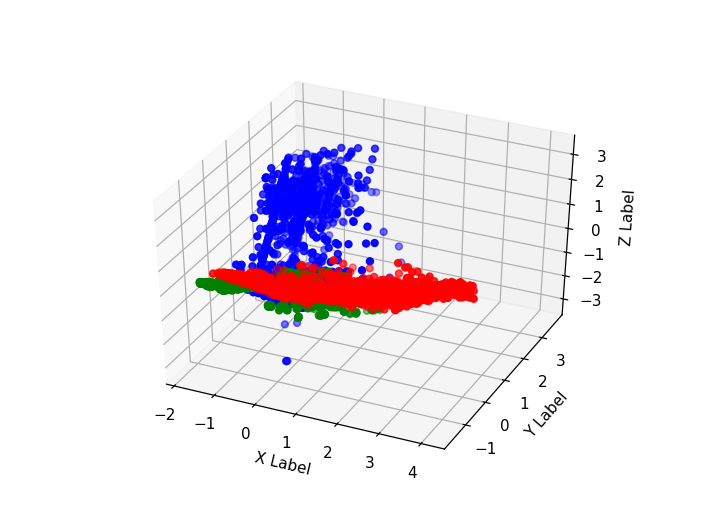

In [25]:
%matplotlib notebook
import matplotlib.pyplot as plt
import ipympl
from mpl_toolkits.mplot3d import Axes3D




fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[com_label==0, 0], reduced_data[com_label==0, 1], reduced_data[com_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_data[com_label==1, 0], reduced_data[com_label==1, 1], reduced_data[com_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_data[com_label==2, 0], reduced_data[com_label==2, 1], reduced_data[com_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_data[com_label==3, 0], reduced_data[com_label==3, 1], reduced_data[com_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_data[com_label==4, 0], reduced_data[com_label==4, 1], reduced_data[com_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [24]:
from sklearn import linear_model
from sklearn import metrics, cross_validation

logreg = linear_model.LogisticRegression(C=1e-1)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(norm_data, com_label)


predicted = cross_validation.cross_val_predict(logreg, norm_data, com_label, cv=10)
print metrics.accuracy_score(com_label, predicted)
print metrics.classification_report(com_label, predicted) 


0.777287761852
             precision    recall  f1-score   support

          0       0.88      0.78      0.83      2428
          1       0.72      0.64      0.67      2391
          2       0.75      0.91      0.82      2437

avg / total       0.78      0.78      0.77      7256



In [12]:
def makePredction():
    data = loadAndFormatData('sonarLog.txt')    
    dataMA = movingAvg(data,  winSize = 5)
    dataNorm = normalizeTestDF(dataMA, params)
    with open("prediction.txt", "a") as myfile:
        for i in range(dataNorm.shape[0]):
            current = dataNorm.iloc[i].values.reshape(1, -1)
#             print(current, str(logreg.predict(current)[0]))
            myfile.write(str(logreg.predict(current)[0]))
    
# makePredction()

In [13]:
def segmentData(df, winSize=5): # offset ???
    temp_list = []
    col_names = []
    for i in range(len(df.columns)*winSize):
        col_names.append("x{}".format(i))
        
    for i in range(0, df.shape[0]-winSize, winSize):
        temp = pd.DataFrame(df.iloc[i:i+winSize, :].values.reshape(1, len(df.columns)*winSize), range(1), columns=col_names)
        
        temp_list.append(temp)
    
    
    result = pd.concat(temp_list, axis=0)
    result = result.reset_index(drop=True)
    print(result.head())
    return result
    
# segLM_MA = segmentData(dataLeftMostMA)
segL_MA = segmentData(dataLeftMA)
# segRM_MA = segmentData(dataRightMostMA)
segR_MA = segmentData(dataRightMA)
segM_MA = segmentData(dataMidMA)



       x0      x1      x2      x3      x4      x5      x6      x7      x8  \
0  0.5280  0.6246  0.7544  0.7126  1.2516  0.5280  0.6246  0.7536  0.6894   
1  0.5292  0.6260  0.7536  0.7144  0.6848  0.5286  0.6264  0.7544  0.7216   
2  0.5292  0.6258  0.7570  0.6748  0.6886  0.5292  0.6262  0.7580  0.6732   
3  0.5288  0.6246  0.7586  0.6588  2.2788  0.5288  0.6246  0.7572  0.6466   
4  0.5292  0.6246  0.7546  0.6348  2.3490  0.5288  0.6248  0.7552  0.6408   

       x9   ...       x15     x16     x17     x18     x19     x20     x21  \
0  0.9778   ...    0.5294  0.6240  0.7528  0.6858  0.6948  0.5298  0.6250   
1  0.6798   ...    0.5292  0.6262  0.7560  0.6918  0.6822  0.5292  0.6260   
2  1.0360   ...    0.5284  0.6254  0.7592  0.6714  1.7276  0.5288  0.6246   
3  2.2102   ...    0.5284  0.6254  0.7552  0.6346  2.2110  0.5286  0.6254   
4  2.3490   ...    0.5280  0.6260  0.7572  0.6404  2.2800  0.5270  0.6264   

      x22     x23     x24  
0  0.7532  0.7072  0.6898  
1  0.7560  0.6762 

In [14]:
com_seg_data, com_seg_label = labelAndCombineData([pd.concat([segLM_MA, segL_MA], axis=0), pd.concat([segRM_MA, segR_MA], axis=0), segM_MA])
# print(com_seg_data, com_seg_label)

norm_seg_data, params = normalizeTrainDF(com_seg_data)
print(norm_seg_data.head())

pca=PCA(n_components=3, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)



NameError: name 'segLM_MA' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_seg_data[com_seg_label==0, 0], reduced_seg_data[com_seg_label==0, 1], reduced_seg_data[com_seg_label==0, 2:], c='r', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==1, 0], reduced_seg_data[com_seg_label==1, 1], reduced_seg_data[com_seg_label==1, 2:], c='b', marker='o')
ax.scatter(reduced_seg_data[com_seg_label==2, 0], reduced_seg_data[com_seg_label==2, 1], reduced_seg_data[com_seg_label==2, 2:], c='g', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==3, 0], reduced_seg_data[com_seg_label==3, 1], reduced_seg_data[com_seg_label==3, 2:], c='c', marker='o')
# ax.scatter(reduced_seg_data[com_seg_label==4, 0], reduced_seg_data[com_seg_label==4, 1], reduced_seg_data[com_seg_label==4, 2:], c='m', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
logreg = linear_model.LogisticRegression(C=10)

pca=PCA(n_components=5, copy=True, whiten=False)
reduced_seg_data = pca.fit_transform(norm_seg_data)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(reduced_seg_data, com_seg_label)


predicted = cross_validation.cross_val_predict(logreg, reduced_seg_data, com_seg_label, cv=10)
print metrics.accuracy_score(com_seg_label, predicted)
print metrics.classification_report(com_seg_label, predicted) 